**Data Scientist Challenge - LATAM Airlines**

**Daniel Felipe Osorio Marin:**  https://www.linkedin.com/in/dfosoriom/


A continuación solución al reto propuesto:


**Contexto de negocio**

El transporte aéreo se ha catalogado a través de los años como uno de los medios de
transporte más utilizados y necesarios por la sociedad, a raíz del avance en la industria de la
aviación el mundo ha crecido de manera acelerada. A raíz de todo este proceso, los problemas
en los retrasos aéreos se han vuelto más comunes, los cuales tienden a generar más impactos
negativos en las aerolíneas debido al incremento de flujo en la cantidad de pasajeros que
toman dichos vuelos (Gonzales, 2020).



**Retrasos de los vuelos y sus causas**


A lo largo de los años, los aeropuertos vienen presentando un aumento en la cantidad
de aeronaves de las compañías de aerolíneas, que buscan satisfacer las necesidades del
incremento de personas y cargas que se transportan a diario. Por esta razón, se ha evidenciado
un crecimiento en el número de los vuelos retrasados, la congestión es una problemática que
aqueja a todos los aeropuertos del mundo, generando así grandes pérdidas económicas tanto
para las aerolíneas a causa del combustible, factores operacionales, entre otros, como para
los usuarios, que además por su inconformidad en muchas ocasiones no vuelven a tomar un
vuelo en la aerolínea que originó el retraso en sus actividades ( GONZÁLEZ, 2020)



**Analítica de datos**

Por lo anterior, se identifica una gran oportunidad para que por medio del análisis de datos se puede llevar a cabo desde un criterio cuantitativo, y predictivo, modelos que permitan mejorar la operatividad. Lo anterior acompanado de un contexto de negocio que permita la implementación de modelos y medición de los mismos en pro de la mejora continua en sus procesos.




# Entendimiento de los datos

In [ ]:
%%capture
!pip install pandas
!pip install matplotlib

In [126]:
#Instalación de librerias y paquetes necesarios para análisis exploratorio de datos EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, time, datetime


In [129]:
# importar datos csv
 
df = pd.read_csv("dataset_SCL .csv") 


In [130]:
#Mostrar primeros 5 filas del los datos
df.head(5) 


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami


In [131]:
#Revisar nombre de columnas 
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES'],
      dtype='object')

In [132]:
#Tamaño del los datos
df.shape


(68206, 18)

In [133]:
#Revisión de tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Fecha-I    68206 non-null  object 
 1   Vlo-I      68167 non-null  object 
 2   Ori-I      68167 non-null  object 
 3   Des-I      68167 non-null  object 
 4   Emp-I      68167 non-null  object 
 5   Fecha-O    68167 non-null  object 
 6   Vlo-O      68166 non-null  object 
 7   Ori-O      68167 non-null  object 
 8   Des-O      68167 non-null  object 
 9   Emp-O      68167 non-null  object 
 10  DIA        68167 non-null  float64
 11  MES        68167 non-null  float64
 12  AÑO        68167 non-null  float64
 13  DIANOM     68167 non-null  object 
 14  TIPOVUELO  68167 non-null  object 
 15  OPERA      68167 non-null  object 
 16  SIGLAORI   68167 non-null  object 
 17  SIGLADES   68167 non-null  object 
dtypes: float64(3), object(15)
memory usage: 9.4+ MB


In [134]:
# Medidas de tendencia central basicas 
df.describe()

,DIA,MES,AÑO
count,68167.000000,68167.000000,68167.000000
mean,15.714906,6.620359,2017.000029
std,8.782835,3.522783,0.005417
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [135]:
# Revisión de los ultimos 5 filas
df.tail(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68201,2017-12-22 14:55:00,400.0,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22.0,12.0,2017.0,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400.0,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25.0,12.0,2017.0,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400.0,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27.0,12.0,2017.0,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400.0,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29.0,12.0,2017.0,Viernes,I,JetSmart SPA,Santiago,Lima
68205,2017-12-31 14:55:00,400.0,SCEL,SPJC,JAT,2017-12-31 15:04:00,400.0,SCEL,SPJC,JAT,31.0,12.0,2017.0,Domingo,I,JetSmart SPA,Santiago,Lima


#Descripción de variables (dado en el problema):





*   Fecha-I : Fecha y hora programada del vuelo.

*   Vlo-I : Número de vuelo programado. 

*   Ori-I : Código de ciudad de origen programado.


*  Des-I : Código de ciudad de destino programado.
*  Emp-I : Código aerolínea de vuelo programado.
*  Fecha-O : Fecha y hora de operación del vuelo.
*  Vlo-O : Número de vuelo de operación del vuelo.
*  Ori-O : Código de ciudad de origen de operación
*  Des-O : Código de ciudad de destino de operación.
*  Emp-O : Código aerolínea de vuelo operado.
*  DIA : Día del mes de operación del vuelo.
*  MES : Número de mes de operación del vuelo.
*  AÑO : Año de operación del vuelo.
*  DIANOM : Día de la semana de operación del vuelo.
*  TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
* OPERA : Nombre de aerolínea que opera.
* SIGLAORI : Nombre ciudad origen.
*  SIGLADES : Nombre ciudad destino




*Variables Fechas*

* Fecha-I
* Fecha-O 
* Día
* Mes 
* año ( solo 2017 )

*Variables Categoricas*




* Vlo-I : Número de vuelo programado.
* Ori-I : Código de ciudad de origen programado.
* Des-I : Código de ciudad de destino programado.
* Emp-I : Código aerolínea de vuelo programado.
* Vlo-O : Número de vuelo de operación del vuelo.
* Ori-O : Código de ciudad de origen de operación
* Des-O : Código de ciudad de destino de operación.
* Emp-O : Código aerolínea de vuelo operado.
* DIANOM : Día de la semana de operación del vuelo.
* TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.
* OPERA : Nombre de aerolínea que opera.
* SIGLAORI : Nombre ciudad origen.
* SIGLADES : Nombre ciudad destino


**Limpieza y tratamiento inicial de datos**

A continuación se muestra la limpieza y consideraciones iniciales realizadas sobre los datos entre ellas se encuentran:



*   Conversión de fechas a datetime 
*   Eliminación de nulos en filas con campo Fecha-I, esto debido a que es menos   del 2% de datos y no es representativo para el análisis aca mostrado

*   Creación de columna *dif_min* y con esto observar distribuciones iniciales de los datos 


*   casting a columnas Vlo-O y Vlo-I, esto se hace para que ambas sean el mismo tipo de variable y que puedan ser posteriomente comparadas.







In [136]:
#Convertir fechas de analisis a datetime
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'], errors='coerce')

In [137]:
#Identificación de nuls en Fecha-I, n ose hace en Fecha-O pues esta no contiene.
idx = df[df['Fecha-I'].isnull()].index
print (idx)


Int64Index([17059, 17060, 39316, 55332, 55333, 55334, 55335, 55336, 55337,
            55338, 55339, 55340, 55341, 55342, 55363, 61401, 61402, 61403,
            61404, 61405, 61406, 61407, 61408, 61409, 61410, 61411, 61412,
            67658, 67659, 67660, 67661, 67662, 67663, 67664, 67665, 67666,
            67667, 67668, 67669],
           dtype='int64')


In [138]:
#Elimina columnas filas con Fecha Fecha-I en 0 es menos del 2%datos

df.drop([17059, 17060, 39316, 55332, 55333, 55334, 55335, 55336, 55337,
            55338, 55339, 55340, 55341, 55342, 55363, 61401, 61402, 61403,
            61404, 61405, 61406, 61407, 61408, 61409, 61410, 61411, 61412,
            67658, 67659, 67660, 67661, 67662, 67663, 67664, 67665, 67666,
            67667, 67668, 67669], axis=0, inplace=True)

In [139]:
#Convertir fechas a datetimes para creación de columnas adicionales
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

In [140]:
#Diferencias de valores unicos de vuelos programados y operados
print(df["Vlo-I"].unique().shape)
print(df["Vlo-O"].unique().shape)

(746,)
(863,)


In [141]:
#Diferencia entre numero de  vuelo programado y operado
df[df['Vlo-I']!=df['Vlo-O']].shape

(1850, 18)

In [142]:
#Casting y limpieza en Vlo programado y operado y conversion a string para que la comparación sea real dado que algunas tienen .0 al final
df['Vlo-O']=df['Vlo-O'].astype(str).str.replace('\.0','')
df['Vlo-I']=df['Vlo-I'].astype(str).str.replace('\.0','')
#Verificar nuevamente la diferencia 
df[df['Vlo-I']!=df['Vlo-O']].shape


<ipython-input-142-963ef92e1639>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Vlo-O']=df['Vlo-O'].astype(str).str.replace('\.0','')
<ipython-input-142-963ef92e1639>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Vlo-I']=df['Vlo-I'].astype(str).str.replace('\.0','')


(120, 18)

In [143]:
# Verificar cambios en valores posterior al casting 
df.iloc[68068]['Vlo-I']

'203'

In [144]:
#Revisión de fecha max y min se encuentra 1 vuelo del 2018
print(df['Fecha-I'].min())
print(df['Fecha-I'].max())
print(df['Fecha-O'].min())
print(df['Fecha-O'].max())

2017-01-01 00:15:00
2017-12-31 23:55:00
2017-01-01 00:04:00
2018-01-01 00:12:00


## **1) ¿Cómo se distribuyen los datos?**

Para esta primera parte es importante revisar como se distribuyen los vuelos en el tiempo, por mes, semana y días. Por lo anterior se usara dos graficos de mapa de calor que daran cuenta sobre el comportamiento de los vuelos en el tiempo.

In [ ]:
%%capture
!pip install calplot
!pip install seaborn
!pip install july
!pip install scipy

In [146]:
#Importar paquete y librerias necesarias para creación de graficas

import matplotlib.pyplot as plt
import seaborn as sns
import calplot

In [147]:
#Creación de copia de df para ser usado solo para las graficas de distribución de datos
dfe=df.copy()

In [148]:
#Creación de columnas
dfe['Fecha_plan'] = pd.to_datetime(dfe['Fecha-I']).dt.date
dfe['Fecha_plan2'] = pd.to_datetime(dfe['Fecha-I']).dt.date
dfe["cantidad"]=1

In [149]:
#Cambio en el tipo de variable
dfe['Fecha_plan2'] = pd.to_datetime(dfe['Fecha_plan2'])
#Reordenar el indice 
dfe.set_index('Fecha_plan2', inplace = True)

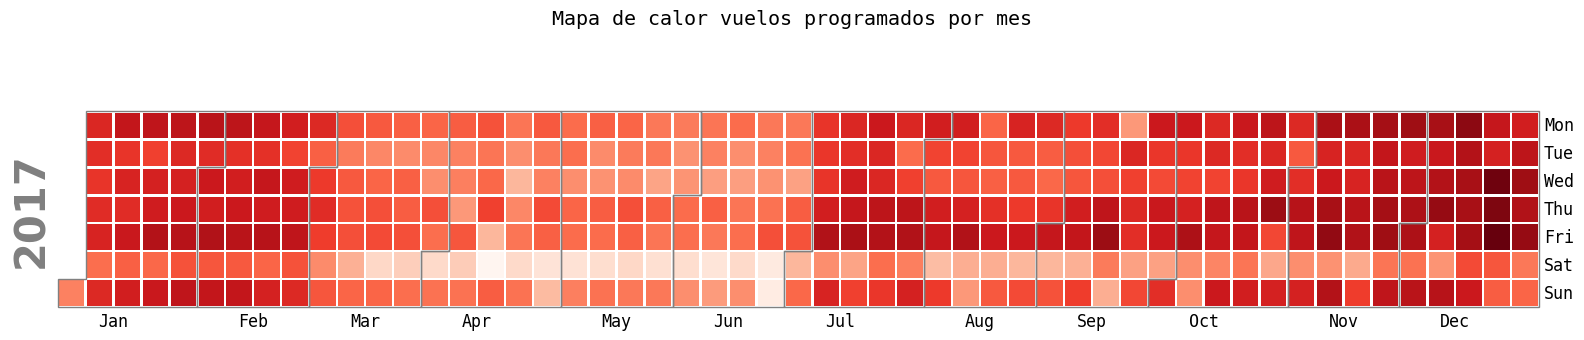

In [150]:
#creación del mapa de calor #1
pl1 = calplot.calplot(data = dfe["cantidad"],how = 'sum', cmap = 'Reds', figsize = (16, 4), suptitle = "Mapa de calor vuelos programados por mes")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


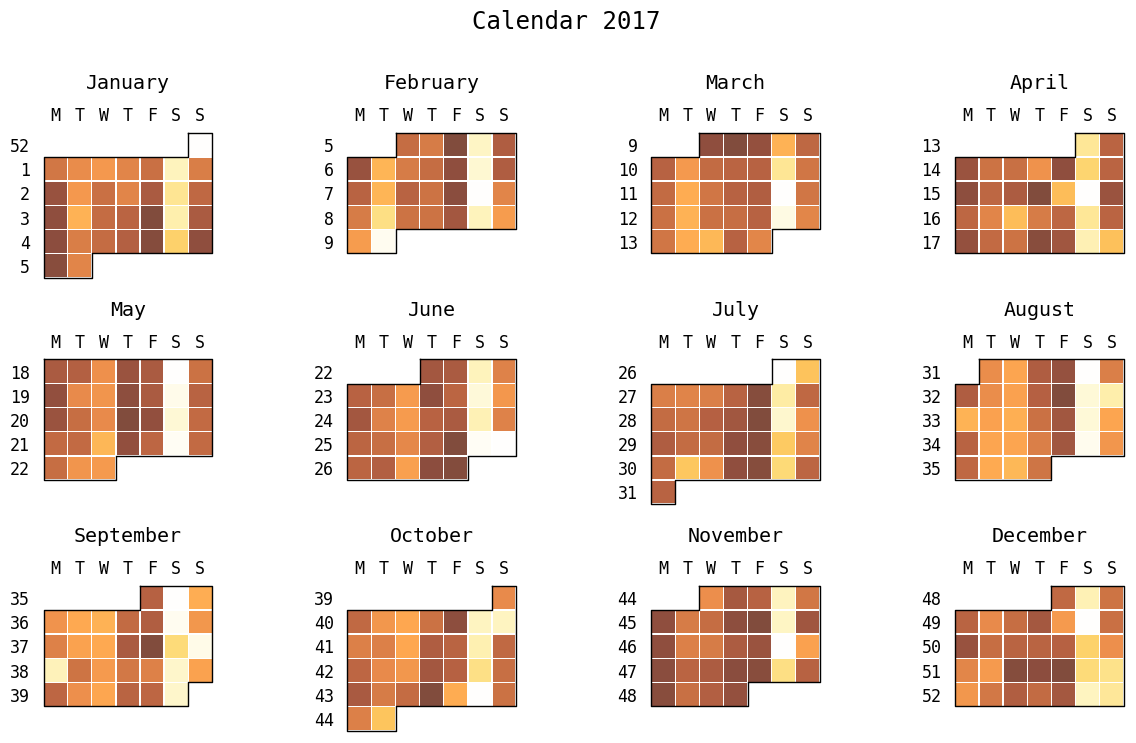

In [151]:
#Creació de mapa de calor 2
import july
from july.utils import date_range
df_cmap= dfe['Fecha_plan'].value_counts().rename_axis('Fechas_conteo').reset_index(name='cantidad')
july.calendar_plot(df_cmap.Fechas_conteo, data = df_cmap["cantidad"], cmap = 'golden');

**Los mapa de calor**

 Los “heatmaps”  son una representación gráfica de datos donde los valores se representan mediante color segun la su ocurrencia, y observar donde se tiene  mayor concentración de valores 


Los anteriores mapas de calor son una muestra inicial de como estan distribuidos nuestros datos y en que meses, dias y temporalidades estos se encuentran.

Se observa:

Sobre los meses:

*   Los meses con mayor cantidad de vuelos programados son concentrados en los meses de noviembre, diciembre y enero. Siendo **diciembre** donde se concentran la mayoria de vuelos

*  Los meses con menor concentración de vuelos programados son abril, mayo y junio. 

Sobre los días:

*   Los días con mayor frecuencia de vuelo programado son Viernes, jueves y lunes
*   Los días de menor frecuencia de vuelo programado son: martes, miercoles y Sabado.








Variable retraso

Cómo se distribuye la variable retraso. Desde este punto se creara una variable retraso 'dif_min', la cual es la difenrencia entre Fecha-O y Fecha-I en minutos. Se considera que dada la naturaleza del objetivo de la presente desafio, identificar como se distribuye esta variable ayudara a la compresión de como se comportan los retrasos

In [152]:
dfe['dif_min'] = (dfe['Fecha-O'] - dfe['Fecha-I'])
dfe['dif_min'] = (dfe['Fecha-O'] - dfe['Fecha-I'])/ pd.Timedelta('1 minutes')


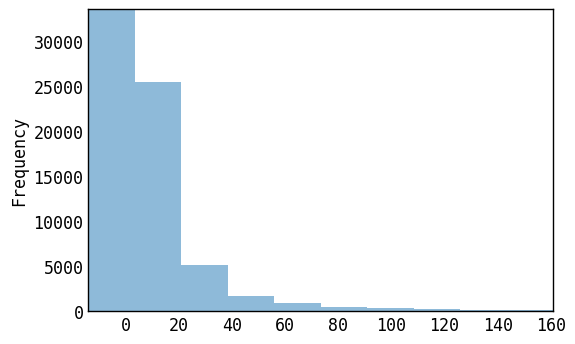

In [153]:
# Distribución de variavle 'dif_min'
dfe['dif_min'].plot.hist(alpha = 0.5);

La anterior grafica nos muestra un histograma en forma de J, dado que la mayoria de datos se presentan en un extremo nos da indicios que posiblemente nuestra variable 'dif_min' no se distribuya de manera normal,


Esto puede indicarnos que en su mayoria los tiempos de retraso cuando llegan a ocurrir  son muy prolongados.

A continuación se revisara las medidas de tendencia central para esta variable:

In [154]:
#Calculo de medidas de tendencia central iniciales

media = dfe['dif_min'].mean()
mediana = dfe['dif_min'].median()
moda = dfe['dif_min'].mode()
print("""
    Media: %d
    Mediana: %d
    Moda: %d
""" % (media,mediana,moda))


    Media: 9
    Mediana: 4
    Moda: 0



Las anteriores medidas de tendencia central nos indican:



*   El promedio del tiempo de retrado de los vuelos es de 9 minutos posterior a la hora programada ( se debe revisar los valores extremos)
*   La mediana nos indica el valor que dentro del conjunto de la variable es menor que el 50% de los datos y mayor que el 50% restante.
*   Se tiene como moda el valor de 0 lo cual indica que es el valor que mas se repite y esto quiere decir que se ha cumplido la hora programada, dado que no hay diferencia con la operada.


A continuación otras medidas que nos pueden indicar esta variable como esta distribuida





In [155]:
#calculo de medidas de tendencia central restantes. 
import scipy.stats as ss
std = dfe["dif_min"].std(ddof=0)
var = dfe["dif_min"].var(ddof=0)
assert(np.sqrt(var) == std)
rango = dfe["dif_min"].max() - dfe["dif_min"].min()
iqr = dfe["dif_min"].quantile(0.75) - dfe["dif_min"].quantile(0.25)
asimetria = ss.skew(dfe["dif_min"])

print(std )
print(asimetria)
print(rango)
print(iqr)
print(std)
print(var)
print(asimetria)

19.3080951680855
3.553538462672623
175.0
13.0
19.3080951680855
372.8025390198466
3.553538462672623


Las medidas de tendencia central anteriores nos dan muestra que los datos se encuentran dispersos en relación a la media, adicionalmente tambien se encuentra que esta variable es altamente asimentrica ( esto se confirma por lo mostrado en el histograma) 

## **2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :**

A continuación se muestra el procesamiento realizado para crear las variables solicitadas para este apartado: 




*   *temporada_alta*: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
*   *dif_min :* diferencia en minutos entre Fecha-O y Fecha-I .
*   *atraso_15 :* 1 si dif_min > 15, 0 si no.
*   *periodo_dia :*mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .


  

In [156]:
#Creación columna dif_min
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])
df['dif_min'] = (df['Fecha-O'] - df['Fecha-I'])/ pd.Timedelta('1 minutes')
df.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1.0,1.0,2017.0,Domingo,I,American Airlines,Santiago,Miami,3.0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2.0,1.0,2017.0,Lunes,I,American Airlines,Santiago,Miami,9.0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3.0,1.0,2017.0,Martes,I,American Airlines,Santiago,Miami,9.0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4.0,1.0,2017.0,Miercoles,I,American Airlines,Santiago,Miami,3.0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5.0,1.0,2017.0,Jueves,I,American Airlines,Santiago,Miami,-2.0


In [157]:
#Creación columna temporada_alta
df['temporada_alta']=df['Fecha-I'].map(lambda x:1 if (x >datetime.strptime('2016-12-15','%Y-%m-%d') 
and x < datetime.strptime('2017-03-1','%Y-%m-%d')) else 1 if (x >datetime.strptime('2017-07-15','%Y-%m-%d')
and x < datetime.strptime('2017-07-31','%Y-%m-%d')) else 1 if (x >datetime.strptime('2017-09-11','%Y-%m-%d')
and x < datetime.strptime('2017-09-30','%Y-%m-%d')) else 1 if (x >datetime.strptime('2017-12-15','%Y-%m-%d') 
and x < datetime.strptime('2018-03-1','%Y-%m-%d')) 
  else 0)

In [158]:
#Conteo cantidad temporada alta o no
df['temporada_alta'].value_counts()

0    46349
1    21818
Name: temporada_alta, dtype: int64

In [159]:
#Creación columna atraso_15
df['atraso_15']=df['dif_min'].map(lambda x:1 if x > 15  else 0)

In [160]:
#Creación columna aux_hora para calcular columna periodo_dia
df['aux_hora']=df['Fecha-I'].dt.time
#Creación columna periodo_día
df['periodo_dia']=df['aux_hora'].map(lambda x:'mañana' if (
    x > datetime.strptime('05:00:00','%H:%M:%S').time() and 
    x < datetime.strptime('11:59:00','%H:%M:%S').time()) 
else 'tarde' if (x > datetime.strptime('12:00:00','%H:%M:%S').time() and 
    x < datetime.strptime('18:59:00','%H:%M:%S').time()) else 'noche')  

In [161]:
#Verificación de columnas creadas sobre el df para una muestra aleatoria
df.sample(10)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,dif_min,temporada_alta,atraso_15,aux_hora,periodo_dia
30171,2017-06-30 14:00:00,211,SCEL,SCIE,LAN,2017-06-30 14:24:00,211,SCEL,SCIE,LXP,...,Viernes,N,Grupo LATAM,Santiago,Concepcion,24.0,0,1,14:00:00,tarde
23477,2017-05-28 18:10:00,57,SCEL,SCQP,SKU,2017-05-28 18:23:00,57,SCEL,SCQP,SKU,...,Domingo,N,Sky Airline,Santiago,Temuco,13.0,0,0,18:10:00,tarde
39552,2017-08-18 14:20:00,8137,SCEL,SBGL,TAM,2017-08-18 14:41:00,8137,SCEL,SBGL,TAM,...,Viernes,I,Grupo LATAM,Santiago,Rio de Janeiro,21.0,0,1,14:20:00,tarde
63286,2017-12-18 15:10:00,43,SCEL,SCVD,SKU,2017-12-18 16:06:00,43,SCEL,SCVD,SKU,...,Lunes,N,Sky Airline,Santiago,Valdivia,56.0,1,1,15:10:00,tarde
30122,2017-06-16 10:10:00,207,SCEL,SCIE,LAN,2017-06-16 10:15:00,207,SCEL,SCIE,LXP,...,Viernes,N,Grupo LATAM,Santiago,Concepcion,5.0,0,0,10:10:00,mañana
29824,2017-06-01 14:50:00,152,SCEL,SCSE,LAN,2017-06-01 14:54:00,152,SCEL,SCSE,LAN,...,Jueves,N,Grupo LATAM,Santiago,La Serena,4.0,0,0,14:50:00,tarde
35792,2017-07-16 19:25:00,221,SCEL,SCIE,LAN,2017-07-16 20:42:00,221,SCEL,SCIE,LXP,...,Domingo,N,Grupo LATAM,Santiago,Concepcion,77.0,1,1,19:25:00,noche
31877,2017-06-10 07:25:00,750,SCEL,SBGR,LAN,2017-06-10 07:31:00,750,SCEL,SBGR,LAN,...,Sabado,I,Grupo LATAM,Santiago,Sao Paulo,6.0,0,0,07:25:00,mañana
52627,2017-10-27 07:16:00,162,SCEL,SCDA,LAN,2017-10-27 07:27:00,162,SCEL,SCDA,LAN,...,Viernes,N,Grupo LATAM,Santiago,Iquique,11.0,0,0,07:16:00,mañana
40614,2017-08-09 12:00:00,507,SCEL,SAEZ,SKU,2017-08-09 12:02:00,507,SCEL,SAEZ,SKU,...,Miercoles,I,Sky Airline,Santiago,Buenos Aires,2.0,0,0,12:00:00,noche


In [162]:
# se elimina columna 'aux_hora' para exportar achivo en limpio
df=df.drop(['aux_hora'], axis=1)

In [163]:
#Verificación de columnas creadas para exportar archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']]

,temporada_alta,dif_min,atraso_15,periodo_dia
0,1,3.0,0,noche
1,1,9.0,0,noche
2,1,9.0,0,noche
3,1,3.0,0,noche
4,1,-2.0,0,noche
...,...,...,...,...
68201,1,46.0,1,tarde
68202,1,16.0,1,tarde
68203,1,40.0,1,tarde
68204,1,13.0,0,tarde


In [164]:
#Exportar archivo synthetic_features.csv
df[['temporada_alta','dif_min','atraso_15','periodo_dia']].to_csv('synthetic_features.csv',index=False)

In [165]:
#Verificación cantidad sobre nuestra variable a predecir atraso_15
df['atraso_15'].value_counts()

0    55561
1    12606
Name: atraso_15, dtype: int64

In [166]:
#Verificación cantidad sobre nuestra variable a predecir atraso_15
df['atraso_15'].value_counts(normalize=True)

0    0.815072
1    0.184928
Name: atraso_15, dtype: float64

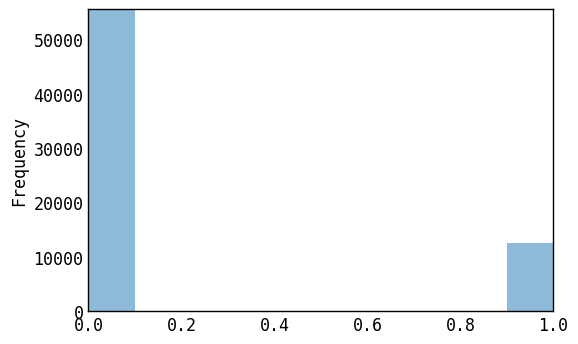

In [167]:
df['atraso_15'].plot.hist(alpha = 0.5); #hisrograma para variable a predecir atraso_15

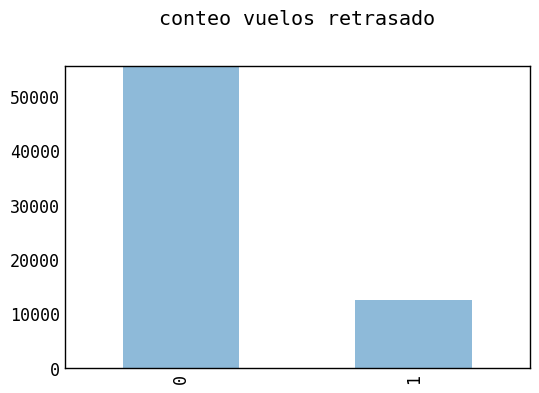

In [168]:
plot = df['atraso_15'].value_counts().plot(kind='bar', alpha = 0.5,
                                            title='conteo vuelos retrasado' )


**Consideración:** 
Para el desarrollo del la presente prueba se tomara como retraso cuando el valor de la variable atraso_15 es mayor a 15 minutos.

Finalmente para este punto se verifico la cantidad y proporción de la variable 'atraso_15' Se observa que en su mayoria los vuelos para el periodo de tiempo del 2017 salieron sin un retraso mayor a 15 minutos. Por lo cual el histograma muestra que la variable se encuentra no balanceada y esto puede influir en los modelos de predicción a utilizar.

# 3) ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

A continuación se mostrara como se compone la tasa de atraso para las diferentes variables presentes en los datos. Se comenzara con una tasa general, y se realizara luego una a una por las diferentes varibles. Finalmente se mostrara el top 10 de los vuelos con mayor tasa de atraso y el top 10 de aerolinea con mayor tasa de retraso

In [169]:
dfa=df.copy()
# tasa de atraso Global:
dfa['atraso_15'].value_counts(normalize=True)

0    0.815072
1    0.184928
Name: atraso_15, dtype: float64

**Tasa de atraso global**

Se observa que el 18% de los vuelos presentes en los datos sufrio de un atraso. 

In [170]:
#Se filtra solo los vuelos con retraso
dfa = dfa[dfa.atraso_15.isin([1])]


In [171]:
#Conteo total de los vuelos retrasados 
dfa['atraso_15'].value_counts()

1    12606
Name: atraso_15, dtype: int64

**Tasa de atraso por tipo de vuelo**

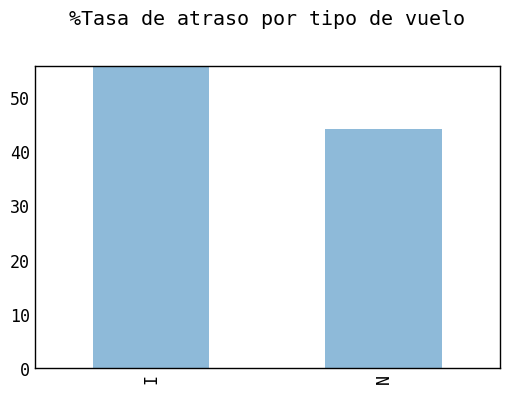

In [172]:
#Tasa de retrso por tipo de vuelo %
plot = (100 * dfa['TIPOVUELO'].value_counts() / len(dfa['TIPOVUELO'])).plot(
kind='bar', title='%Tasa de atraso por tipo de vuelo', alpha = 0.5)

In [173]:
#Proporción de retraso por tipo de vuelo
dfa['TIPOVUELO'].value_counts(normalize=True)

I    0.558464
N    0.441536
Name: TIPOVUELO, dtype: float64

**Tasa de atraso por destino programado**

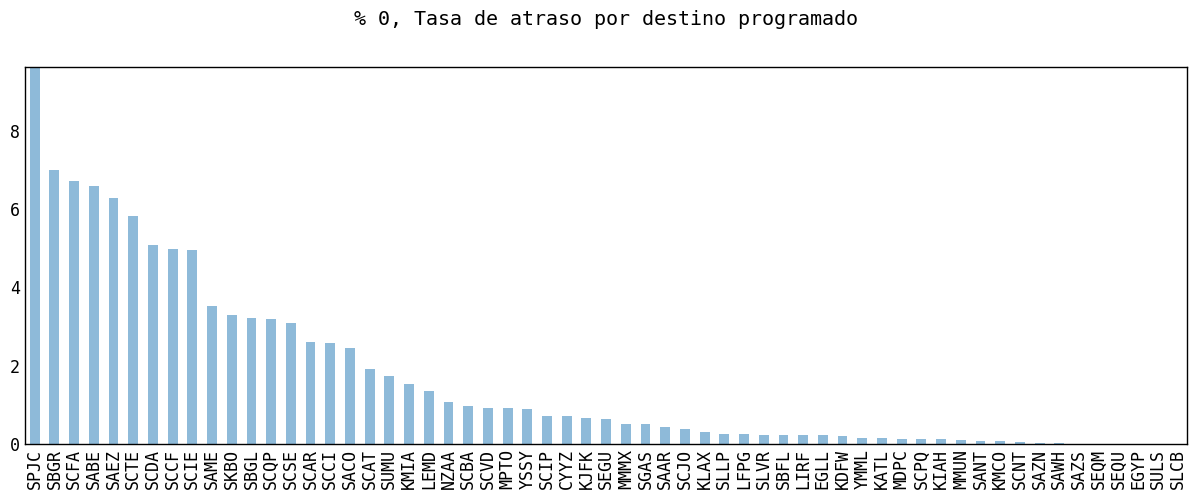

In [174]:
# Tasa de retrso por destino programado
plot = (100 * dfa['Des-I'].value_counts() / len(dfa['Des-I'])).plot(
kind='bar', title='% 0, Tasa de atraso por destino programado', alpha = 0.5,figsize=(15,5))

In [175]:
#Proporción de retraso por destino
dfa['Des-I'].value_counts(normalize=True).head(5)

SPJC    0.096303
SBGR    0.069887
SCFA    0.067190
SABE    0.065842
SAEZ    0.062669
Name: Des-I, dtype: float64

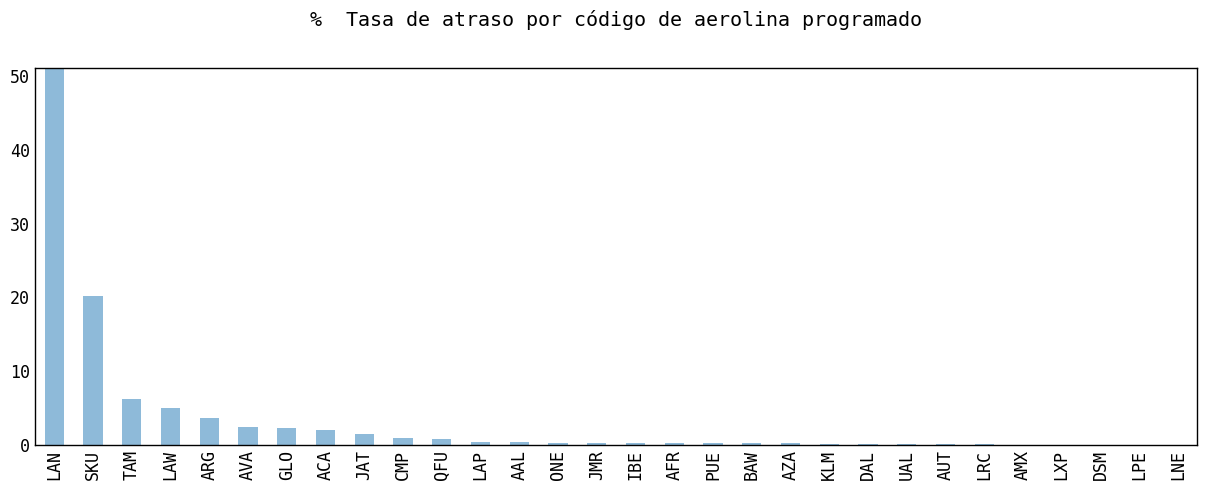

In [176]:
# Tasa de retrso por código de aerolinea programado 
plot = (100 * dfa['Emp-I'].value_counts() / len(dfa['Emp-I'])).plot(
kind='bar', title='%  Tasa de atraso por código de aerolina programado', alpha = 0.5,figsize=(15,5))

In [177]:
#Proporción de retraso por código de aerolinea 
dfa['Emp-I'].value_counts(normalize=True).head(5)

LAN    0.511264
SKU    0.201491
TAM    0.061875
LAW    0.050928
ARG    0.037125
Name: Emp-I, dtype: float64

In [178]:
#Conteo de retraso por código de aerolinea 
df['Emp-I'].value_counts(normalize=True).head(5)

LAN    0.551190
SKU    0.209750
TAM    0.044728
ARG    0.028592
CMP    0.027139
Name: Emp-I, dtype: float64

In [179]:
#Proporción total de código de aerolinea en los datos.
df['Emp-I'].value_counts(normalize=True).head(5)

LAN    0.551190
SKU    0.209750
TAM    0.044728
ARG    0.028592
CMP    0.027139
Name: Emp-I, dtype: float64

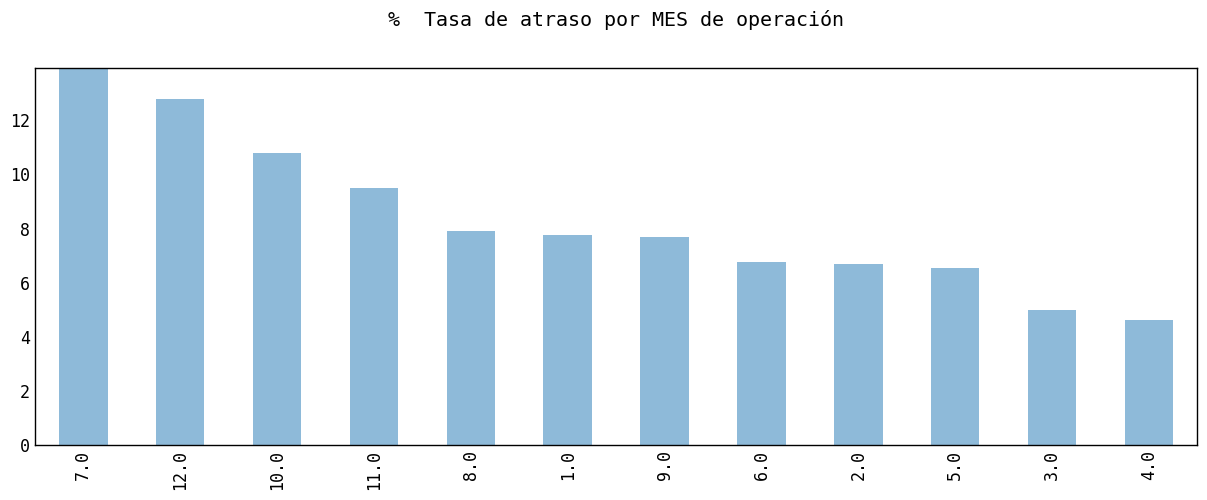

In [180]:
## Tasa de retrso por mes de operación
plot = (100 * dfa['MES'].value_counts() / len(dfa['MES'])).plot(
kind='bar', title='%  Tasa de atraso por MES de operación', alpha = 0.5,figsize=(15,5))

In [181]:
#Proporción total de  restraso por Mes
dfa['MES'].value_counts(normalize=True).head(5)

7.0     0.139457
12.0    0.127796
10.0    0.107885
11.0    0.095034
8.0     0.079010
Name: MES, dtype: float64

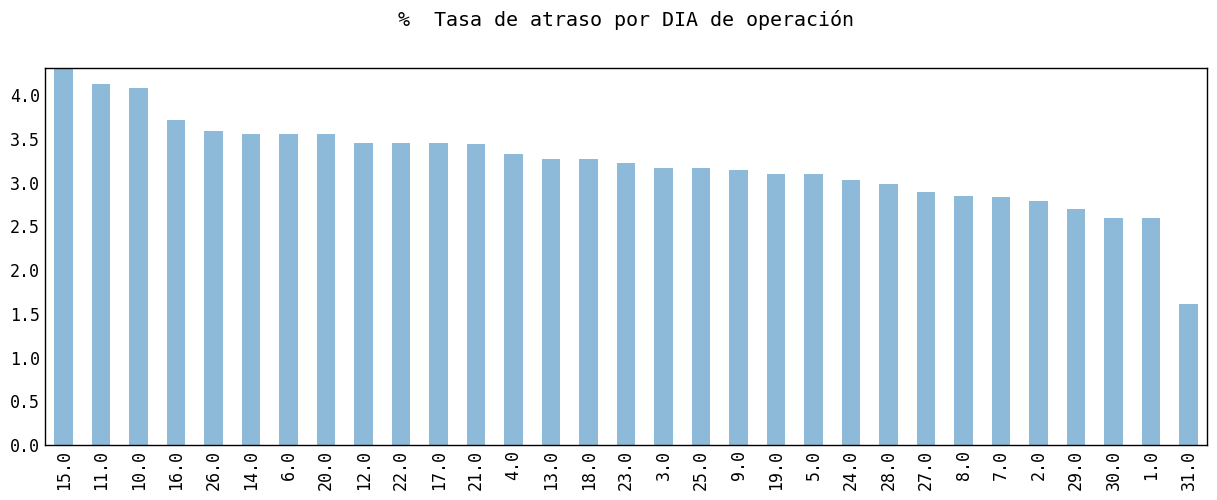

In [182]:
# Tasa de retrso por Día de operación
plot = (100 * dfa['DIA'].value_counts() / len(dfa['DIA'])).plot(
kind='bar', title='%  Tasa de atraso por DIA de operación', alpha = 0.5,figsize=(15,5))

In [183]:
#Proporción de retrasos por día.

dfa['DIA'].value_counts(normalize=True).head(5)

15.0    0.043154
11.0    0.041250
10.0    0.040854
16.0    0.037125
26.0    0.035935
Name: DIA, dtype: float64

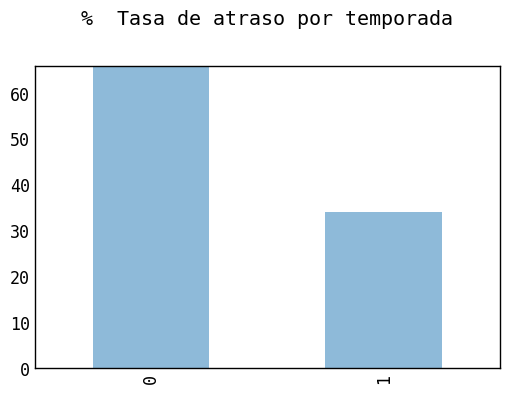

In [184]:

# Tasa de retrso por temporada
plot = (100 * dfa['temporada_alta'].value_counts() / len(dfa['temporada_alta'])).plot(
kind='bar', title='%  Tasa de atraso por temporada', alpha = 0.5)

In [185]:
dfa['temporada_alta'].value_counts(normalize=True).head(5)

0    0.658734
1    0.341266
Name: temporada_alta, dtype: float64

In [186]:
df['temporada_alta'].value_counts(normalize=True).head(5)

0    0.679933
1    0.320067
Name: temporada_alta, dtype: float64

Conclusiones iniciales para tasas de retraso:




*   Para tipo de vuelo aquellos que son internacionales tienen una tasa del 56% 
sobre 44% de los nacionales. Este comportamiento puede indicar que los vuelos internacionales son más propensos a retrasos, desde el negocio se debe verificar que condiciones de operación, controles aeroportuarios enmarcan estos vuelos. 

*   Para el destino programado, se observa que el 9% de los vuelos retrasados estaban programados para las ciudades con código SPJC, seguido de ciudades con código SBGR y SCFA. Esto puede dar indicio que estos vuelos programados para estos destinos sean mas propensos a ser retrasados. Adicionalmente debe ser una alarma para hacer un análisis de identificación de casusas de retraso con posibles miras de mejoras enfocas inicialmente en dichas rutas.


*   Se observa que la aerolínea con mayor tasa de retraso es LAN, sin embargo se debe tener en cuenta que esta es la aerolínea con mayor cantidad de vuelos programados de los datos (37573 en total) lo cual representa un 55% de la cantidad de vuelos totales programados. Un 30% mas que la siguiente aerolínea SKU.

*   Los meses con mayor tasa de retraso son Julio y diciembre sumando el 27% entre ambos meses, estos meses correspondes a meses de temporada alta. Lo anterior se puede traducir en estrategias de mejoramiento de logístico o posible aumento en personal para meses particulares.   
*   Los días con mayor tasa de retraso son los días 15 y 11, sin embargo para esto es necesario hacer un análisis de distribución por franja horaria y temporada para poder realizar una afirmación adicional.

*   Si bien se observó que los meses con mayor tasa de retraso son julio y diciembre, se observa que la mayor parte de tasa de retraso es se concentra para la temporada baja. Sin embargo se debe tener en cuenta que del total de los datos, los vuelos programados  para temporada baja representa un  66% del total de los vuelos 






Para finalizar este apartado se sumaran dos datos adicionales y es la cantidad de vuelos en que se registraron cambios entre aerolinea programada y operada.

y tambien entre el top 10 de aerolineas con mayor cantidad de retrasos. 

In [187]:
#Conteo de vuelos que sufrieron cambio entre vuelo programado y operado
dfe["cambio_vuelo"]=0
dfe.loc[dfe['Vlo-I']!=dfe['Vlo-O'],"cambio_vuelo"]=1 
dfe['cambio_vuelo'].value_counts() # conteo nueva columna 

0    68047
1      120
Name: cambio_vuelo, dtype: int64

In [188]:
#Top 10 de vuelos con mayor cantidad de restrasos
dfr=df.copy()
df_n_retraso=dfr[dfr.atraso_15==1]
df_n_retraso=df_n_retraso.groupby(['Vlo-O'])['atraso_15'].count().sort_values(ascending=False).to_frame().reset_index() 
df_n_retraso.head(10)

,Vlo-O,atraso_15
0,7663,234
1,116,233
2,92,169
3,704,159
4,1291,148
5,8137,142
6,801,135
7,531,131
8,455,129
9,28,114




*   Con lo anterior se observa que 120 vuelos sufrieron cambio entre la aerolínea programada y la aerolínea operada. Esto indica que son vuelos que posiblemente sufrieron algún tupo de afectación mayor o bien, sufrieron cambio dentro de un mismo grupo que opera lo cual puede derivarse o ser consecuencia de un atraso. 
Finalmente se presenta un top 10 con los vuelos que sufren con mayor frecuencia retrasos. Esto puede ayudar a identificar y enfocar los esfuerzos a la hora de realizar un diagnóstico de causa raíz 

*   Con lo anterior se observa que 120 vuelos sufrieron cambio entre la aerolínea programada y la aerolínea operada. Esto indica que son vuelos que posiblemente sufrieron algún tupo de afectación mayor o bien, sufrieron cambio dentro de un mismo grupo que opera lo cual puede derivarse o ser consecuencia de un atraso. 
Finalmente se presenta un top 10 con los vuelos que sufren con mayor frecuencia retrasos. Esto puede ayudar a identificar y enfocar los esfuerzos a la hora de realizar un diagnóstico de causa raíz.


Según lo anterior, se espera que variables como lo son si pertenece al top 10 de vuelos mas atrasados MES, DÍA, número de vuelo sean algunas de las variables con mayor influencia para predecir un retraso



# 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas

Para este apartado seran usados dos modelos : LGBMClassifier y CatboostClassifier

**LGMClassifier**:

 Este modelo es un árbol de decisión de aumento de gradiente altamente eficiente es un algoritmo basado en histogramas que coloca valores continuos en contenedores discretos, lo que conduce a un entrenamiento más rápido y un uso de memoria más eficiente.  (zephyrnet,2022).

**CatboostClassifier**:

El gradient boosting o potenciación del gradiente es un potente algoritmo de aprendizaje de máquinas. La esencia del método consiste en construir un conjunto de modelos débiles (por ejemplo, árboles de toma de decisiones) en los que (a diferencia del bagging) los modelos no se construyen independientemente (paralelamente), sino secuencialmente. Esto significa que el siguiente árbol aprenderá de los errores del árbol precedente, y luego se repitirá el proceso, aumentando el número de modelos débiles (mql5, 2021).

A continuació se hace un primer exploratorio de los modelos antes mencionados sin incluir nuevas variables:

In [ ]:
%%capture
! pip install lightgbm
! pip install catboost
! pip install sklearn 

In [189]:
#Importar paquetes y librerias necesarias para modelos



import lightgbm as lgb 
from sklearn.model_selection import train_test_split
import lightgbm as lgb 
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.metrics import  precision_recall_curve, auc

In [190]:
#Definir matris X columnas para usadas para predecir
X=df[['Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Vlo-O',
       'Ori-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta',
     'periodo_dia']]

In [191]:
# Variable a predecir 
y=df['atraso_15']

In [192]:
#Creacion de lista de columnas para realizar casting a categorico
categoricalcolumns=['Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Vlo-O',
       'Ori-O','Emp-O', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 
       'periodo_dia']

In [193]:
#Casteo a categorico
for c in categoricalcolumns:
  col_type=X[c].dtype
  if col_type == 'object' or col_type.name == 'category':
    X[c] = X[c].astype('category')

<ipython-input-193-e9fb88da1ba5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].astype('category')


In [194]:
# Split de datos para prueba y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [195]:
#Verificación de Casting a variables categoricas
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47716 entries, 16948 to 43570
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Vlo-I           47716 non-null  category
 1   Ori-I           47716 non-null  category
 2   Des-I           47716 non-null  category
 3   Emp-I           47716 non-null  category
 4   Vlo-O           47716 non-null  category
 5   Ori-O           47716 non-null  category
 6   Emp-O           47716 non-null  category
 7   DIA             47716 non-null  float64 
 8   MES             47716 non-null  float64 
 9   AÑO             47716 non-null  float64 
 10  DIANOM          47716 non-null  category
 11  TIPOVUELO       47716 non-null  category
 12  OPERA           47716 non-null  category
 13  SIGLAORI        47716 non-null  category
 14  SIGLADES        47716 non-null  category
 15  temporada_alta  47716 non-null  int64   
 16  periodo_dia     47716 non-null  category
dtypes: categ

In [196]:
#Aplicación modelo LGMClassifier
clf=lgb.LGBMClassifier()
clf.fit(X_train,y_train)

LGBMClassifier()

In [197]:
#Aplicación del modelo sobre partición de prueba
y_predict=clf.predict(X_test)

#Reporte de la clasifiación del modelo con LGMClassifier
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90     16689
           1       0.58      0.16      0.25      3762

    accuracy                           0.82     20451
   macro avg       0.71      0.57      0.58     20451
weighted avg       0.79      0.82      0.78     20451



In [198]:
# aplicación CatBoostClassifier


clf_2=CatBoostClassifier(verbose=False)

clf_2.fit(X_train,y_train,
        cat_features=categoricalcolumns)

print(('CatBoost model parameters:'))
print(clf_2.get_params())

In [199]:
y_predict_2=clf_2.predict(X_test)
print(classification_report(y_test,y_predict_2)) #Reporte de la clasifiación del modelo

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     16689
           1       0.62      0.14      0.23      3762

    accuracy                           0.83     20451
   macro avg       0.73      0.56      0.56     20451
weighted avg       0.80      0.83      0.78     20451



Se hace una evaluación inicial de ambos modelos y su capacidad para clasificar ( Esto teniendo presente que la finalidad es predecir, para lo cual mas adelante se usaran metricas adicionales **para los modelos finales efocados en la predicción**).


**Precision (Precisión)**
Con la métrica de precisión podemos medir la calidad del modelo de machine learning en tareas de clasificación.


**Recall (Exhaustividad)**
La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.


**El valor F1** se utiliza para combinar las medidas de precision y recall en un sólo valor.


**Accuracy (Exactitud)**
La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado. Esta es una de las métricas más usadas y favoritas (iartificial,2020).


Luego de lo anterior se procede a crear nuevas variables para mejorar el performance del modelo:


In [200]:
df2=df.copy()
#Creación de nueva columna Cambio_vuelo para formar nuevas entradas al modelo
df2["cambio_vuelo"]=0
df2.loc[df2['Vlo-I']!=df2['Vlo-O'],"cambio_vuelo"]=1          

In [201]:
df2['cambio_vuelo'].value_counts() # conteo nueva columna 

0    68047
1      120
Name: cambio_vuelo, dtype: int64

In [202]:
df2["cambio_erolinea"]=0 
df2.loc[df['Emp-I']!=df['Emp-O'],"cambio_erolinea"]=int(1)

In [203]:
#Creacion de nueva columna cambio de aerolinea, para sumar al modelo.
df2["cambio_erolinea"]=0 
df2.loc[df['Emp-I']!=df['Emp-O'],"cambio_erolinea"]=int(1)

In [204]:
#Conteo de la nueva variable cambio de aerolinea
df2['cambio_erolinea'].value_counts()

0    49533
1    18634
Name: cambio_erolinea, dtype: int64

In [205]:
#Creación de columna dummies para sumar al modelo
df2=pd.get_dummies(df2,columns=['DIANOM','periodo_dia'])

In [206]:
#Creación de nuevo df para calcular el top 10 de los vuelos con mayor retraso

df_n_retraso=df2[df2.atraso_15==1]
df_n_retraso=df_n_retraso.groupby(['Vlo-O'])['atraso_15'].count().sort_values(ascending=False).to_frame().reset_index() 

In [207]:
#Convertir a lista los vuelos con mayor retraso
lista_top_retraso=list(df_n_retraso['Vlo-O'].head(10).values)
print(lista_top_retraso)

['7663', '116', '92', '704', '1291', '8137', '801', '531', '455', '28']


In [208]:
#Creación de columna vuelo_atraso_top10 que dara atriburo si el vuelo pertence a los mas atrasados
df2['vuelo_atraso_top10']= 0
df2.loc[df2['Vlo-O'].isin(lista_top_retraso),"vuelo_atraso_top10"]=int(1)

In [209]:
# conteo de vuelo  perteneciente al top 10 de atrasos
df2['vuelo_atraso_top10'].value_counts()

0    64430
1     3737
Name: vuelo_atraso_top10, dtype: int64

In [210]:
#Verificar columnas creadas
df2.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'TIPOVUELO', 'OPERA',
       'SIGLAORI', 'SIGLADES', 'dif_min', 'temporada_alta', 'atraso_15',
       'cambio_vuelo', 'cambio_erolinea', 'DIANOM_Domingo', 'DIANOM_Jueves',
       'DIANOM_Lunes', 'DIANOM_Martes', 'DIANOM_Miercoles', 'DIANOM_Sabado',
       'DIANOM_Viernes', 'periodo_dia_mañana', 'periodo_dia_noche',
       'periodo_dia_tarde', 'vuelo_atraso_top10'],
      dtype='object')

In [211]:
#Definir matris X columnas para usadas para predecir
X=df2[['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O','Emp-O', 'DIA', 'MES', 'AÑO', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta', 'cambio_vuelo', 'cambio_erolinea', 'DIANOM_Domingo',
       'DIANOM_Jueves', 'DIANOM_Lunes', 'DIANOM_Martes', 'DIANOM_Miercoles',
       'DIANOM_Sabado', 'DIANOM_Viernes', 'periodo_dia_mañana',
       'periodo_dia_noche', 'periodo_dia_tarde']]

In [212]:
# Variable a predecir
y=df2['atraso_15']

In [213]:
#Creacion de lista de columnas para realizar casting a categorico
categoricalcolumns=['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O',
       'Emp-O', 'TIPOVUELO',
       'OPERA', 'SIGLADES', 
       ]

In [214]:
#Verificacin de creación de variable dummy y one-hot encoding
df2.head(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM_Jueves,DIANOM_Lunes,DIANOM_Martes,DIANOM_Miercoles,DIANOM_Sabado,DIANOM_Viernes,periodo_dia_mañana,periodo_dia_noche,periodo_dia_tarde,vuelo_atraso_top10
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,0,0,0,0,0,0,0,1,0,0
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,0,1,0,0,0,0,0,1,0,0
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,0,0,1,0,0,0,0,1,0,0
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,0,0,0,1,0,0,0,1,0,0
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,1,0,0,0,0,0,0,1,0,0


In [215]:
#Casteo a categorico
for c in categoricalcolumns:
  col_type=X[c].dtype
  if col_type == 'object' or col_type.name == 'category':
    X[c] = X[c].astype('category')

<ipython-input-215-e9fb88da1ba5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[c] = X[c].astype('category')


In [216]:
# Split de datos para prueba y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [217]:
#Aplicación modelo LGMClassifier
clf=lgb.LGBMClassifier(random_state=42)
clf.fit(X_train,y_train)

LGBMClassifier(random_state=42)

In [218]:
#Aplicación del modelo sobre partición de prueba
y_predict=clf.predict(X_test)
#Reporte de la clasifiación con LGMClassifier
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90     16572
           1       0.62      0.15      0.24      3879

    accuracy                           0.82     20451
   macro avg       0.73      0.56      0.57     20451
weighted avg       0.79      0.82      0.77     20451



In [219]:
# aplicación CatBoostClassifier
# Nuevo entrenamiento al modelo con nuevos parametros Modelo final
clf_4=CatBoostClassifier(random_state=42,iterations=500, scale_pos_weight=3.0,verbose=False)

clf_4.fit(X_train,y_train,
        cat_features=categoricalcolumns)

print(('CatBoost model parameters:'))
print(clf_4.get_params())

# 5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la performance?

En el apartado anterior se entreno como medelo final un CatBoostClassifier a continuacion se mostrarán las metricas empleadas para evaluación del modelo, asi como las variables de mayon influencia y un modo de mejorar la performance del mismo.


Como nota al lector se ha empleado este algoritmo dado que el algoritmo de CatBoost puede trabajar con diversos tipos de datos el cualayuda a resolver un amplio abanico de problemas. Dos de las principales características del
algoritmo es que produce resultados de alta calidad sin un entrenamiento de datos extenso comparados con otros métodos de machine learning y puede trabajar con múltiples clases de datos que aparecen en variados contextos de negocio.


**Identificación de variables que mas influyen en la predicción:**

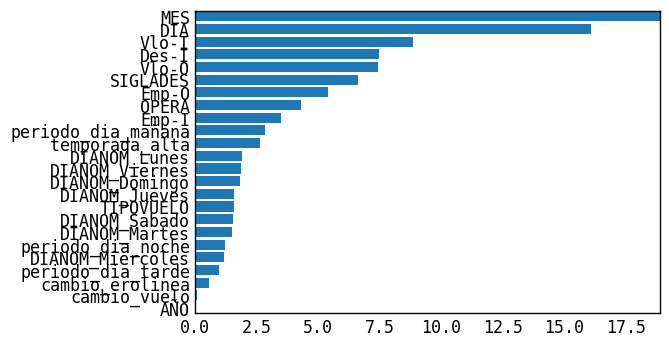

In [220]:
#Identificación de las variables de mayor importancia para el modelo

sorted_feat = clf_4.feature_importances_.argsort()
plt.figure()
plt.barh(X_train.columns[sorted_feat],clf_4.feature_importances_[sorted_feat])
plt.show()

La anterior grafica se observa que el mes, día, número de vuelo programado, y ciudad de destino son las variables de las cuales aprende mas el modelo, por su parte variables como año no tiene influencia ( Y es de esperarse pues los datos pertenecen a un solo valor 2017)

Metricas para medición del performance del modelo:

En este apartado se usaran metricas para medir la capacidad de clasificar y predecir.

In [221]:
#Calculo de reporte de clasificación
y_predict=clf_4.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86     16572
           1       0.41      0.46      0.44      3879

    accuracy                           0.77     20451
   macro avg       0.64      0.65      0.65     20451
weighted avg       0.78      0.77      0.78     20451



Se observa que este modelo tiene presición media para CLASIFICAR aquellos vuelos con restraso, al igual que su Recall al momento sobre informar la cantidad de vuelos retrasados que estara en capacidad de clasificar. 

**Mediciones para predicción:**

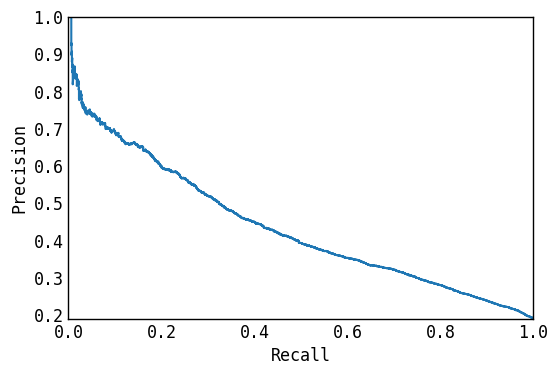

0.4356404050954999


In [222]:
#Creación de grafica PR 

y_predict_proba_2=clf_4.predict_proba(X_test)
proba_delay = y_predict_proba_2[:,1]

precision, recall, thresholds = precision_recall_curve(y_test, proba_delay)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()
auc_pr = auc(recall, precision)
print(auc_pr)

Esta curva PR:


La curva PR es el resultado de dibujar la gráfica entre el precision y el recall. Esta gráfica nos permite ver a partir de qué recall tenemos una degradación de la precisión y viceversa. Lo ideal sería una curva que se acerque lo máximo posible a la esquina superior derecha (alta precisión y alto recall) (medium,2021)



Para esta curva vemos un AP de 0,43 (Average precision) el cual nos sirve para evaluar el rendimiento del modelo en este caso para PREDICCIÓN, entre mas cerca a 1 este sera mejor

In [223]:
#Calculo de metrica log_lost para el modelo
from sklearn.metrics import log_loss  
y_predict_proba_4=clf_4.predict_proba(X_test)
proba_delay = y_predict_proba_4[:,1] #Se toma unicamente para la fila de predicción de 1 es decir la de retrasos. 
log_loss(y_test, proba_delay, eps=1e-15)

0.5026754699381889

**Log loss** 

Mide el rendimiento de un clasificador donde el resultado pronosticado es un valor de **probabilidad** entre 0 y 1. Se puede calcular el Log loss para cada fila utilizando la ecuación de Log loss, que mide como de lejos está cada predicción con respecto a la etiqueta real (juanbarrios,2022). Para este caso el modelo evaluado tiene un Log_loss de 0.5

**Mejoramiento de performance**

**Hyperparameter Tunning**

In [224]:
#Creación de columnas para mejoramiento de performance
X_columns=X.columns.values

In [225]:
#Nueva partición para mejoramiento de performance

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [226]:
#Importar faltantes para optimización de parametros
import random
from sklearn import metrics

In [227]:
#Función para optimizar los hiperparametros 

def search_hyperparams(grid_hyperparameters, x_columns, x_train, x_test, y_train, y_test, categoricalcolumns):
  random.seed(42)
  iters=100
  best_params ={}
  best_score = 0
  for i in list(range(iters)):
    params = {x: random.choice(z) for x,z in grid_hyperparameters.items()}
    temp_clf = CatBoostClassifier(**params, verbose=False)
    temp_clf.fit(x_train,y_train,cat_features=categoricalcolumns, verbose=False)
    temp_proba= x_test.copy()
    temp_proba['probability']=[x[1] for x in temp_clf.predict_proba(temp_proba[x_columns])]
    score = metrics.average_precision_score(list(y_test),temp_proba['probability'].tolist())
    if score > best_score:
      best_score = score
      best_params = params
      print('Best new params: ', best_params)
    return best_params


In [228]:
#Grid para iteración de hiperparametros
grid_hyperparameters={    
    "learning_rate" :[0.0001,0.001,0.01,0.2,0.3],      
    "max_depth":[3,4,5,6,7],    
    "iterations":[200,400,600,800]
}

Atencion la siguiente linea de codigo pretende encontrar hiperparametros optimizados para este 
proceso prueba varias iteraciones con diferentes hiperparametros por lo que correr la siguiente lidea de 
codigo puede tomar un tiempo considerable computacionalmente

In [229]:
#mejores nuevos hiper parametros
search_hyperparams (grid_hyperparameters,X_columns,x_train, x_test, y_train, y_test, categoricalcolumns) 

Best new params:  {'learning_rate': 0.0001, 'max_depth': 3, 'iterations': 600}


{'learning_rate': 0.0001, 'max_depth': 3, 'iterations': 600}

# CONCLUSIONES FINALES


*   Se comprobó la distribución de los vuelos programados por mes y por día  adicional, se valido su concordancia con lo denominado “Temporada alta”

*   Se identifica que hay una tasa global de retraso del 18,4%, lo cual indica que se debe tomar acción basados en los vuelos, destinos, días y meses de con mayor concentración de dicha tasa. 

*   Se observa que de los modelos analizados el modelo CatBoostClassifier tiene mejor performance, aun este sin ser del todo “Optimo para la predicción” Se sugiere realizar trabajo futuro de exploración con otros modelos, y con otros métodos de optimización de parámetros.

*   El presente análisis de datos debe realizarse y validarse con personas expertas en negocio para la formulación de conclusiones que se traduzcan en acciones de mejora.

*   

**Trabajos Futuros:**

*   Identificación de distribución de retrasos por franjas horarias, meses y días de la semana.

*   Mejoramiento en el modelo de predicción con identificación de otros modelos y otros métodos de optimización de parámetros.

*   Complementar este tipo de análisis con Insight de negocio e insumos adicionales como análisis causa raíz que posteriormente se traduzcan en acciones concretas concentradas en reducción de retrasos en vuelos. 


# Referencias




*   Gonzales. (2020). repository.usta. Obtenido de https://repository.usta.edu.co/jspui/bitstream/11634/35742/1/2021yiniortiz.pdf

*   iartificial. (2021). iartificial. Obtenido de https://www.iartificial.net/precision-recall-f1-accuracy-en-clasificacion/

*  juanbarrios. (s.f.). juanbarrios. Obtenido de https://www.juanbarrios.com/evaluando-los-algoritmos-de-clasificacion/

*   medium. (2020). medium. Obtenido de https://medium.com/bluekiri/curvas-pr-y-roc-1489fbd9a527



*   mql5. (2021). mql5. Obtenido de https://www.mql5.com/es/articles/8642











